In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
pd.set_option('display.max_columns', None)

In [66]:
cleaned_data = pd.read_csv(r'/Users/chimuanyaazike/Desktop/Churn/Churn/DataCleaning/cleaned_data.csv')
data = cleaned_data.copy()
data.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,NPS,ChurnLabel,TotalPurchaseFrequency,TotalPurchaseValue,ProductList,Plan,Start_Date,End_Date,TotalInteractionType,numEmails,numCalls,numChats,FirstInteractionDate,LastInteractionDate,AVGLatePayment,NumPaymentMethods,PageViews,TimeSpent(minutes),ActionCount,unique_pages,Logins,Frequency,Rating,Comment,AVGOpenDays,AVGClickDays,churndate,most_recent_action_date_only
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,3,1,38,3994.72,Frozen Cocktail Mixes|Guacamole|Hockey Stick C...,Express,2020-06-08,2022-10-27,Call|Chat|Email,1,1,2,2019-09-26,2021-07-25,13.333333,3,49,15,24,13,19,Weekly,1,I move baby go small big. Office institution s...,818.0,319.0,2020-01-27,2022-11-07
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,6,0,4,2844.35,Baby Protective Wear|Footbags|Watercraft Polishes,Pro,2021-07-21,2022-05-07,Call|Chat|Email,10,5,4,2019-01-12,2022-12-13,3.333333,3,100,9,24,13,9,Weekly,2,Wish what bag cut life. Statement might opport...,110.0,88.0,2019-01-06,2022-12-05
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,3,0,14,1866.52,"Fudge|Pipe Caps & Plugs|Vehicle Waxes, Polishe...",Essential,2019-10-05,2020-08-19,Call|Chat|Email,1,1,1,2019-10-09,2022-01-04,2.666667,3,1,97,12,7,19,Monthly,4,Some Democrat guess but short. Whether behind ...,333.0,117.0,2019-04-30,2022-11-02
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,1,1,28,1378.64,Crêpe & Blini Pans|Electrical Switches|Mouthwa...,Smart,2020-01-14,2022-03-27,Call|Chat|Email,18,17,24,2019-01-03,2022-11-10,26.333333,3,25,31,47,14,4,Daily,1,Yard feel never miss ask billion Congress. Fly...,159.0,423.0,2020-03-03,2022-12-08
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,3,0,39,2425.05,Audiobooks|Fire Extinguisher & Equipment Stora...,Basic,2021-04-08,2022-11-09,Call|Chat|Email,5,4,1,2019-04-10,2022-12-19,0.666667,3,77,51,30,12,12,Weekly,3,Ten determine unit interview challenge stock. ...,193.0,96.0,2019-04-05,2022-12-30


### Process one : Update the dates to datetime format

In [67]:
data.dtypes

CustomerID                        int64
Name                             object
Age                               int64
Gender                           object
Location                         object
Email                            object
Phone                            object
Address                          object
Segment                          object
NPS                               int64
ChurnLabel                        int64
TotalPurchaseFrequency            int64
TotalPurchaseValue              float64
ProductList                      object
Plan                             object
Start_Date                       object
End_Date                         object
TotalInteractionType             object
numEmails                         int64
numCalls                          int64
numChats                          int64
FirstInteractionDate             object
LastInteractionDate              object
AVGLatePayment                  float64
NumPaymentMethods                 int64


In [68]:
col_to_date = ['Start_Date', 'End_Date', 'FirstInteractionDate', 'LastInteractionDate', 'most_recent_action_date_only', 'churndate'] #list of columns to convert to datetime, col stands for column

for col in col_to_date:
    data[col] = pd.to_datetime(data[col], errors='coerce')

### Process 2: is working on numerically EDA

In [69]:
data.select_dtypes(include=['int64', 'float64']).iloc[:, 1:] #selecting only numerical columns for EDA excluding the first column which is the ID column

,Age,NPS,ChurnLabel,TotalPurchaseFrequency,TotalPurchaseValue,numEmails,numCalls,numChats,AVGLatePayment,NumPaymentMethods,PageViews,TimeSpent(minutes),ActionCount,unique_pages,Logins,Rating,AVGOpenDays,AVGClickDays
0,31,3,1,38,3994.72,1,1,2,13.333333,3,49,15,24,13,19,1,818.0,319.0
1,66,6,0,4,2844.35,10,5,4,3.333333,3,100,9,24,13,9,2,110.0,88.0
2,36,3,0,14,1866.52,1,1,1,2.666667,3,1,97,12,7,19,4,333.0,117.0
3,62,1,1,28,1378.64,18,17,24,26.333333,3,25,31,47,14,4,1,159.0,423.0
4,68,3,0,39,2425.05,5,4,1,0.666667,3,77,51,30,12,12,3,193.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12478,55,8,0,14,1196.56,3,3,4,1.000000,3,70,57,6,6,22,2,126.0,443.0
12479,29,7,0,1,710.57,0,1,2,2.000000,3,71,66,9,8,25,3,167.0,40.0
12480,38,1,1,63,5154.42,11,9,6,27.666667,3,96,1,26,9,9,5,383.0,459.0
12481,26,0,0,58,6055.16,4,3,6,22.333333,3,63,2,38,12,2,5,435.0,15.0


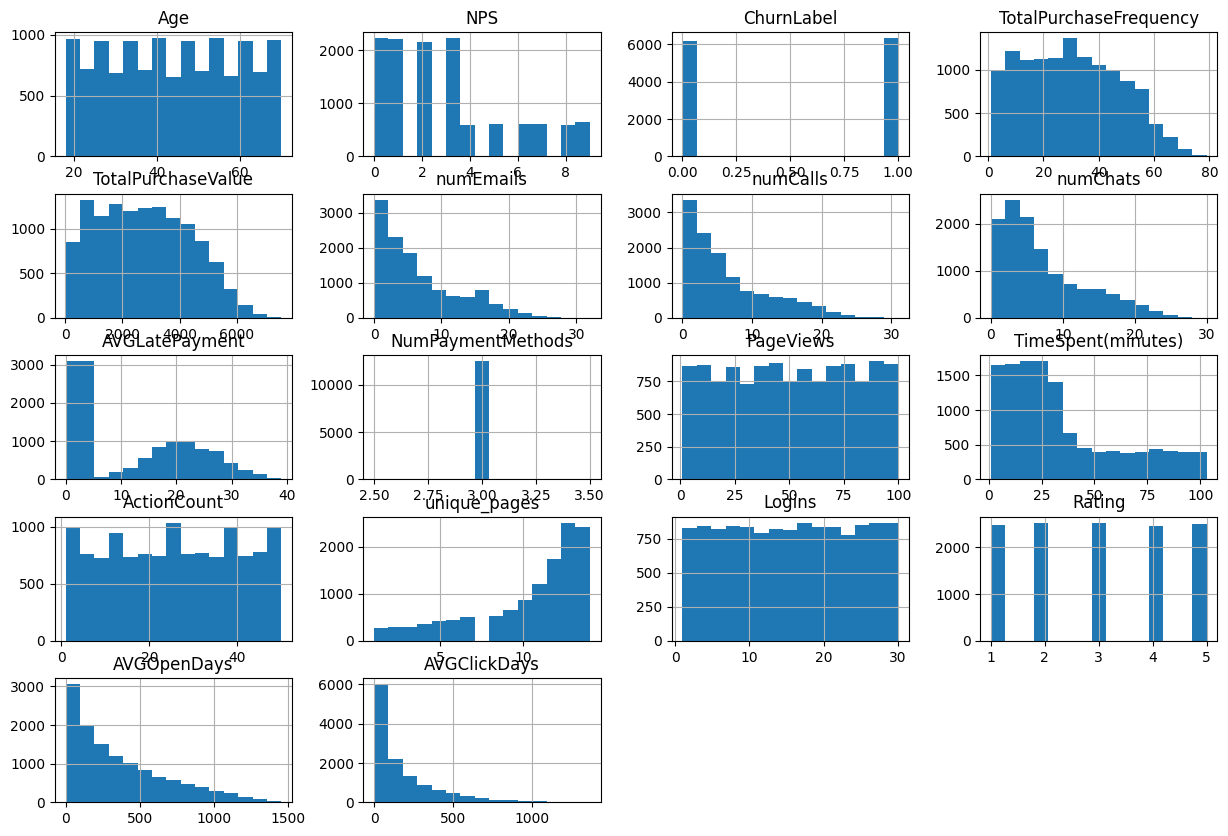

In [70]:
num_distron = data.select_dtypes(include=['int64', 'float64']).iloc[:, 1:] #selecting only numerical columns for EDA excluding the first column which is the ID column
num_distron.hist(bins=15, figsize=(15, 10))
plt.show()


In [71]:
data.select_dtypes(include=['datetime64[ns]'])

,Start_Date,End_Date,FirstInteractionDate,LastInteractionDate,churndate,most_recent_action_date_only
0,2020-06-08,2022-10-27,2019-09-26,2021-07-25,2020-01-27,2022-11-07
1,2021-07-21,2022-05-07,2019-01-12,2022-12-13,2019-01-06,2022-12-05
2,2019-10-05,2020-08-19,2019-10-09,2022-01-04,2019-04-30,2022-11-02
3,2020-01-14,2022-03-27,2019-01-03,2022-11-10,2020-03-03,2022-12-08
4,2021-04-08,2022-11-09,2019-04-10,2022-12-19,2019-04-05,2022-12-30
...,...,...,...,...,...,...
12478,2019-06-15,2021-06-29,2019-05-07,2022-10-09,2022-01-27,2022-10-02
12479,2022-12-10,2022-12-28,2019-12-11,2022-11-05,2020-06-14,2022-11-10
12480,2021-07-04,2021-07-24,2019-01-12,2022-12-08,2020-10-13,2022-11-20
12481,2020-07-21,2021-11-17,2019-04-05,2022-11-15,2020-06-24,2022-09-08


### Process 3: RFM Analysis
- Recency = CurrentDate - LastInterationValue
- Frequency = 
- Monetary Value

### Process 1 for RFM

In [84]:
currentDate = data['LastInteractionDate'].max()

data['recency'] = (currentDate - data['LastInteractionDate'])
data['frequecy'] = data['TotalPurchaseFrequency'] * data['Logins']
data['monetary_value'] = data['TotalPurchaseValue']


f_label = range(1, 6)
m_label = range(1, 6)
r_label = range(5, 0, -1)

data['recency'] = pd.qcut(data['recency'], 5, labels=r_label)
data['frequecy'] = pd.qcut(data['frequecy'], 5, labels=f_label)
data['monetary_value'] = pd.qcut(data['monetary_value'], 5, labels=m_label)

data[['recency', 'frequecy', 'monetary_value']] = data[['recency', 'frequecy', 'monetary_value']].astype('int64')

data['rfm_score'] = data['recency'] + data['frequecy'] + data['monetary_value']

bins = [3, 6, 9, 12, 15]
labels = ['at_risk', 'need_attention', 'loyal_customers', 'champions']
data['customer_segment'] = pd.cut(data['rfm_score'], bins=bins, labels=labels, include_lowest=True)
data.drop(columns=['recency', 'frequecy', 'monetary_value',], inplace=True)


In [85]:
data.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,NPS,ChurnLabel,TotalPurchaseFrequency,TotalPurchaseValue,ProductList,Plan,Start_Date,End_Date,TotalInteractionType,numEmails,numCalls,numChats,FirstInteractionDate,LastInteractionDate,AVGLatePayment,NumPaymentMethods,PageViews,TimeSpent(minutes),ActionCount,unique_pages,Logins,Frequency,Rating,Comment,AVGOpenDays,AVGClickDays,churndate,most_recent_action_date_only,customer_segment,rfm_score
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,3,1,38,3994.72,Frozen Cocktail Mixes|Guacamole|Hockey Stick C...,Express,2020-06-08,2022-10-27,Call|Chat|Email,1,1,2,2019-09-26,2021-07-25,13.333333,3,49,15,24,13,19,Weekly,1,I move baby go small big. Office institution s...,818.0,319.0,2020-01-27,2022-11-07,need_attention,9
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,6,0,4,2844.35,Baby Protective Wear|Footbags|Watercraft Polishes,Pro,2021-07-21,2022-05-07,Call|Chat|Email,10,5,4,2019-01-12,2022-12-13,3.333333,3,100,9,24,13,9,Weekly,2,Wish what bag cut life. Statement might opport...,110.0,88.0,2019-01-06,2022-12-05,need_attention,9
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,3,0,14,1866.52,"Fudge|Pipe Caps & Plugs|Vehicle Waxes, Polishe...",Essential,2019-10-05,2020-08-19,Call|Chat|Email,1,1,1,2019-10-09,2022-01-04,2.666667,3,1,97,12,7,19,Monthly,4,Some Democrat guess but short. Whether behind ...,333.0,117.0,2019-04-30,2022-11-02,at_risk,6
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,1,1,28,1378.64,Crêpe & Blini Pans|Electrical Switches|Mouthwa...,Smart,2020-01-14,2022-03-27,Call|Chat|Email,18,17,24,2019-01-03,2022-11-10,26.333333,3,25,31,47,14,4,Daily,1,Yard feel never miss ask billion Congress. Fly...,159.0,423.0,2020-03-03,2022-12-08,need_attention,7
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,3,0,39,2425.05,Audiobooks|Fire Extinguisher & Equipment Stora...,Basic,2021-04-08,2022-11-09,Call|Chat|Email,5,4,1,2019-04-10,2022-12-19,0.666667,3,77,51,30,12,12,Weekly,3,Ten determine unit interview challenge stock. ...,193.0,96.0,2019-04-05,2022-12-30,loyal_customers,11


In [86]:
data['customer_segment'].value_counts()

customer_segment
need_attention     4149
loyal_customers    4026
at_risk            2726
champions          1582
Name: count, dtype: int64

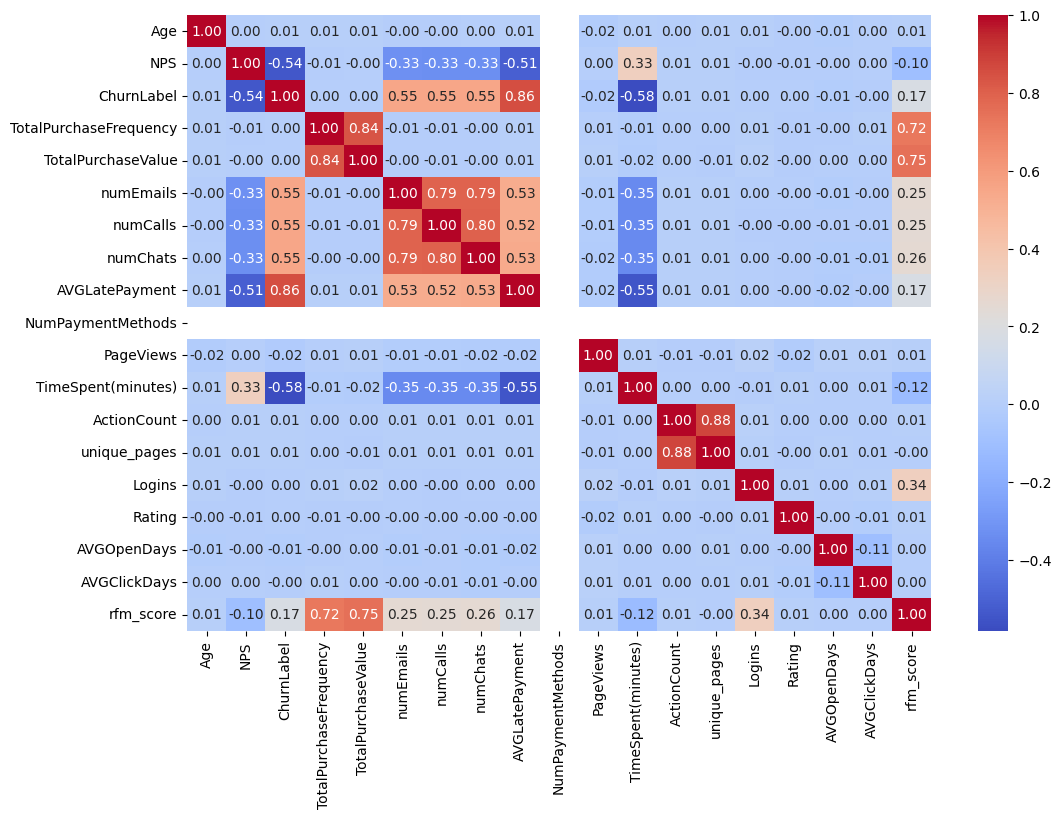

In [87]:
corr_cols = data.select_dtypes(include=[np.number]).iloc[:, 1:]
corr = corr_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


/Users/chimuanyaazike/Desktop/Churn/Churn/venv/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/chimuanyaazike/Desktop/Churn/Churn/venv/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/var/folders/1h/j965vfhx71scm6_c12s_9zxh0000gn/T/ipykernel_17199/2893574829.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_churnLabel.index, y=corr_with_churnLabel.values, palette='viridis')


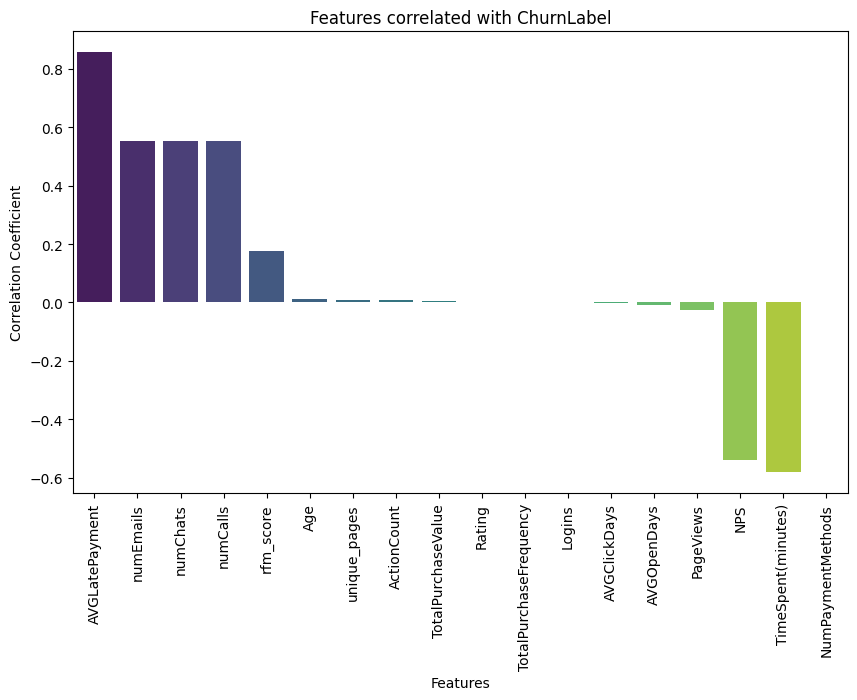

In [91]:
corr_with_churnLabel = data.select_dtypes(include=[np.number]).iloc[:, 1:].corrwith(data['ChurnLabel']).sort_values(ascending=False)[1:]

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_churnLabel.index, y=corr_with_churnLabel.values, palette='viridis')
plt.title('Features correlated with ChurnLabel')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()